<a href="https://colab.research.google.com/github/ammad19/AI-course-exercises/blob/master/pandas_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
!pwd

/content


In [12]:
!unzip Assignment.rar

Archive:  Assignment.rar
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of Assignment.rar or
        Assignment.rar.zip, and cannot find Assignment.rar.ZIP, period.


In [13]:
!unrar x Assignment.rar


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from Assignment.rar


Would you like to replace the existing file Assignment/inventory.csv
  1231 bytes, modified on 2020-12-18 21:14
with a new one
  1231 bytes, modified on 2020-12-18 21:14

[Y]es, [N]o, [A]ll, n[E]ver, [R]ename, [Q]uit Q

Program aborted


In [14]:
!pwd

/content


In [15]:
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as pyplot

census_files = glob.glob("Assignment/states*.csv")

file_list = []
for filename in census_files:
    data = pd.read_csv(filename)
    file_list.append(data)

census_files

['Assignment/states5.csv',
 'Assignment/states0.csv',
 'Assignment/states7.csv',
 'Assignment/states2.csv',
 'Assignment/states6.csv',
 'Assignment/states4.csv',
 'Assignment/states3.csv',
 'Assignment/states9.csv',
 'Assignment/states8.csv',
 'Assignment/states1.csv']

In [16]:
us_census = pd.concat(file_list)
us_census.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Missouri,6045448,4.037247838616718%,77.508069164265%,14.122118155619594%,0.36332853025936646%,1.6244956772334296%,0.10165706051873193%,$49763.98772563177,2964003M_3081445F
1,1,Montana,1014699,3.2688888888888896%,86.41555555555554%,0.4292592592592591%,7.0607407407407425%,0.5703703703703705%,0.07222222222222222%,$47645.682835820895,510163M_F
2,2,Nebraska,1869365,9.203759398496235%,81.13947368421056%,4.956203007518794%,0.8644736842105263%,1.8590225563909788%,0.05714285714285715%,$55916.469696969696,929606M_939759F
3,3,Nevada,2798636,27.100883652430046%,53.23932253313698%,7.739617083946994%,1.0871870397643593%,7.095729013254786%,0.5745213549337267%,$55526.525073746314,1407735M_1390901F
4,4,New Hampshire,1324201,3.3219178082191796%,91.31917808219184%,1.2277397260273974%,0.14280821917808229%,2.191438356164382%,0.016095890410958904%,$68728.8595890411,653484M_670717F


In [17]:
us_census.columns

Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'GenderPop'],
      dtype='object')

In [18]:
us_census.dtypes

Unnamed: 0     int64
State         object
TotalPop       int64
Hispanic      object
White         object
Black         object
Native        object
Asian         object
Pacific       object
Income        object
GenderPop     object
dtype: object

In [19]:
us_census.Income = us_census.Income.replace('[\$]', '', regex=True)
us_census.Income.head()

0     49763.98772563177
1    47645.682835820895
2    55916.469696969696
3    55526.525073746314
4      68728.8595890411
Name: Income, dtype: object

In [20]:
population_split = us_census.GenderPop.str.split("_")
population_split.head()

0    [2964003M, 3081445F]
1            [510163M, F]
2      [929606M, 939759F]
3    [1407735M, 1390901F]
4      [653484M, 670717F]
Name: GenderPop, dtype: object

In [21]:
us_census['male_population'] = population_split.str.get(0)
us_census['female_population'] = population_split.str.get(1)
us_census.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,male_population,female_population
0,0,Missouri,6045448,4.037247838616718%,77.508069164265%,14.122118155619594%,0.36332853025936646%,1.6244956772334296%,0.10165706051873193%,49763.98772563177,2964003M_3081445F,2964003M,3081445F
1,1,Montana,1014699,3.2688888888888896%,86.41555555555554%,0.4292592592592591%,7.0607407407407425%,0.5703703703703705%,0.07222222222222222%,47645.682835820895,510163M_F,510163M,F
2,2,Nebraska,1869365,9.203759398496235%,81.13947368421056%,4.956203007518794%,0.8644736842105263%,1.8590225563909788%,0.05714285714285715%,55916.469696969696,929606M_939759F,929606M,939759F
3,3,Nevada,2798636,27.100883652430046%,53.23932253313698%,7.739617083946994%,1.0871870397643593%,7.095729013254786%,0.5745213549337267%,55526.525073746314,1407735M_1390901F,1407735M,1390901F
4,4,New Hampshire,1324201,3.3219178082191796%,91.31917808219184%,1.2277397260273974%,0.14280821917808229%,2.191438356164382%,0.016095890410958904%,68728.8595890411,653484M_670717F,653484M,670717F


In [22]:
pop_split = pd.DataFrame() # Create a temp empty df
pop_split['male_pop'] = us_census.male_population.str[0:-1]
pop_split['female_pop'] = us_census.female_population.str[0:-1]
pop_split.head()

,male_pop,female_pop
0,2964003,3081445
1,510163,
2,929606,939759
3,1407735,1390901
4,653484,670717


In [23]:
us_census = pd.concat([us_census, pop_split], axis = 1)
us_census.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,male_population,female_population,male_pop,female_pop
0,0,Missouri,6045448,4.037247838616718%,77.508069164265%,14.122118155619594%,0.36332853025936646%,1.6244956772334296%,0.10165706051873193%,49763.98772563177,2964003M_3081445F,2964003M,3081445F,2964003,3081445
1,1,Montana,1014699,3.2688888888888896%,86.41555555555554%,0.4292592592592591%,7.0607407407407425%,0.5703703703703705%,0.07222222222222222%,47645.682835820895,510163M_F,510163M,F,510163,
2,2,Nebraska,1869365,9.203759398496235%,81.13947368421056%,4.956203007518794%,0.8644736842105263%,1.8590225563909788%,0.05714285714285715%,55916.469696969696,929606M_939759F,929606M,939759F,929606,939759
3,3,Nevada,2798636,27.100883652430046%,53.23932253313698%,7.739617083946994%,1.0871870397643593%,7.095729013254786%,0.5745213549337267%,55526.525073746314,1407735M_1390901F,1407735M,1390901F,1407735,1390901
4,4,New Hampshire,1324201,3.3219178082191796%,91.31917808219184%,1.2277397260273974%,0.14280821917808229%,2.191438356164382%,0.016095890410958904%,68728.8595890411,653484M_670717F,653484M,670717F,653484,670717


In [24]:
# Gather the columns we want into the df
us_census = us_census[['State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'male_pop', 'female_pop',]]
# Rename the male and female population columns
us_census.columns = ['State', 'TotalPop', 'Hispanic', 'White', 'Black', 'Native', 'Asian',
       'Pacific', 'Income', 'male_population', 'female_population']
us_census.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,male_population,female_population
0,Missouri,6045448,4.037247838616718%,77.508069164265%,14.122118155619594%,0.36332853025936646%,1.6244956772334296%,0.10165706051873193%,49763.98772563177,2964003,3081445
1,Montana,1014699,3.2688888888888896%,86.41555555555554%,0.4292592592592591%,7.0607407407407425%,0.5703703703703705%,0.07222222222222222%,47645.682835820895,510163,
2,Nebraska,1869365,9.203759398496235%,81.13947368421056%,4.956203007518794%,0.8644736842105263%,1.8590225563909788%,0.05714285714285715%,55916.469696969696,929606,939759
3,Nevada,2798636,27.100883652430046%,53.23932253313698%,7.739617083946994%,1.0871870397643593%,7.095729013254786%,0.5745213549337267%,55526.525073746314,1407735,1390901
4,New Hampshire,1324201,3.3219178082191796%,91.31917808219184%,1.2277397260273974%,0.14280821917808229%,2.191438356164382%,0.016095890410958904%,68728.8595890411,653484,670717


In [25]:
us_census.male_population = pd.to_numeric(us_census.male_population)
us_census.female_population = pd.to_numeric(us_census.female_population)
us_census.dtypes

State                 object
TotalPop               int64
Hispanic              object
White                 object
Black                 object
Native                object
Asian                 object
Pacific               object
Income                object
male_population        int64
female_population    float64
dtype: object

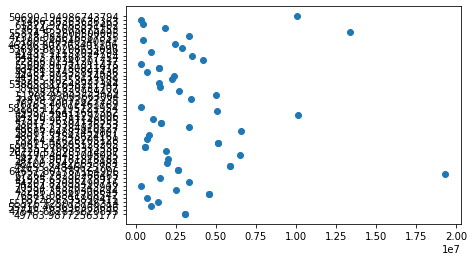

In [26]:
pyplot.scatter(us_census.female_population, us_census.Income) 
pyplot.show()

In [27]:
us_census.female_population.head(15)

0     3081445.0
1           NaN
2      939759.0
3     1390901.0
4      670717.0
5     4561386.0
0     2489527.0
1      349215.0
2     3342840.0
3     1506295.0
4    19334329.0
5     2630239.0
0     5913084.0
1     1942789.0
2     1990780.0
Name: female_population, dtype: float64

In [28]:
fem_pop_nan = us_census.female_population.isnull()
fem_pop_nan.head(15)
fem_pop_nan.value_counts()

False    57
True      3
Name: female_population, dtype: int64

In [29]:
example_nan = us_census[['TotalPop', 'male_population', 'female_population']]
example_nan.iloc[12]

TotalPop             11575977.0
male_population       5662893.0
female_population     5913084.0
Name: 0, dtype: float64

In [30]:
nan_value = us_census.TotalPop - us_census.male_population
nan_value

0     3081445
1      504536
2      939759
3     1390901
4      670717
5     4561386
0     2489527
1      349215
2     3342840
3     1506295
4    19334329
5     2630239
0     5913084
1     1942789
2     1990780
3     6534215
4     1869213
5      543273
0     5123362
1      696428
2      806083
3     6556862
4     3333382
5     1558931
0     4561386
1     1051703
2    10131373
3     5049925
4      353677
5     5913084
0     3057895
1     3455936
2     5038598
3     2727005
4     1536358
5     3081445
0     1558931
1     1453125
2     2233145
3     2364097
4      679019
5     3057895
0     1444150
1      318031
2     4195682
3     3497739
4      937789
5     2890732
0      543273
1     2455167
2      419713
3     3331859
4    13367298
5     1444150
0     2630239
1     1841615
2      478041
3      340810
4    10045763
5     5123362
dtype: int64

In [31]:
us_census.female_population = us_census.female_population.fillna(value=nan_value)
example_nan_fixed = us_census[['TotalPop', 'male_population', 'female_population']]
example_nan_fixed.iloc[12]

TotalPop             11575977.0
male_population       5662893.0
female_population     5913084.0
Name: 0, dtype: float64

In [32]:
us_census.female_population.head(15)

0     3081445.0
1      504536.0
2      939759.0
3     1390901.0
4      670717.0
5     4561386.0
0     2489527.0
1      349215.0
2     3342840.0
3     1506295.0
4    19334329.0
5     2630239.0
0     5913084.0
1     1942789.0
2     1990780.0
Name: female_population, dtype: float64

In [33]:
duplicates = us_census.duplicated()
duplicates.value_counts()

False    51
True      9
dtype: int64

In [34]:
us_census = us_census.drop_duplicates()
duplicates_check = us_census.duplicated()
duplicates_check.value_counts()

False    51
dtype: int64

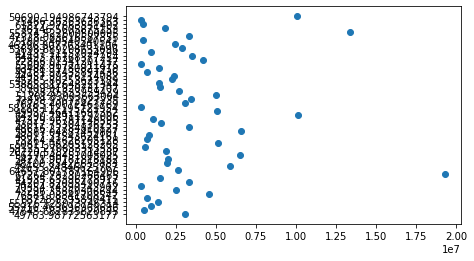

In [35]:
pyplot.scatter(us_census.female_population, us_census.Income) 
pyplot.show()

In [36]:
us_census.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,male_population,female_population
0,Missouri,6045448,4.037247838616718%,77.508069164265%,14.122118155619594%,0.36332853025936646%,1.6244956772334296%,0.10165706051873193%,49763.98772563177,2964003,3081445.0
1,Montana,1014699,3.2688888888888896%,86.41555555555554%,0.4292592592592591%,7.0607407407407425%,0.5703703703703705%,0.07222222222222222%,47645.682835820895,510163,504536.0
2,Nebraska,1869365,9.203759398496235%,81.13947368421056%,4.956203007518794%,0.8644736842105263%,1.8590225563909788%,0.05714285714285715%,55916.469696969696,929606,939759.0
3,Nevada,2798636,27.100883652430046%,53.23932253313698%,7.739617083946994%,1.0871870397643593%,7.095729013254786%,0.5745213549337267%,55526.525073746314,1407735,1390901.0
4,New Hampshire,1324201,3.3219178082191796%,91.31917808219184%,1.2277397260273974%,0.14280821917808229%,2.191438356164382%,0.016095890410958904%,68728.8595890411,653484,670717.0


In [37]:
us_census.Hispanic = us_census.Hispanic.replace('[\%]', '', regex=True)
us_census.White = us_census.White.replace('[\%]', '', regex=True)
us_census.Black = us_census.Black.replace('[\%]', '', regex=True)
us_census.Native = us_census.Native.replace('[\%]', '', regex=True)
us_census.Asian = us_census.Asian.replace('[\%]', '', regex=True)
us_census.Pacific = us_census.Pacific.replace('[\%]', '', regex=True)
us_census.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,male_population,female_population
0,Missouri,6045448,4.037247838616718,77.508069164265,14.122118155619594,0.36332853025936646,1.6244956772334296,0.10165706051873193,49763.98772563177,2964003,3081445.0
1,Montana,1014699,3.2688888888888896,86.41555555555554,0.4292592592592591,7.0607407407407425,0.5703703703703705,0.07222222222222222,47645.682835820895,510163,504536.0
2,Nebraska,1869365,9.203759398496235,81.13947368421056,4.956203007518794,0.8644736842105263,1.8590225563909788,0.05714285714285715,55916.469696969696,929606,939759.0
3,Nevada,2798636,27.100883652430046,53.23932253313698,7.739617083946994,1.0871870397643593,7.095729013254786,0.5745213549337267,55526.525073746314,1407735,1390901.0
4,New Hampshire,1324201,3.3219178082191796,91.31917808219184,1.2277397260273974,0.14280821917808229,2.191438356164382,0.016095890410958904,68728.8595890411,653484,670717.0


In [38]:
us_census.Hispanic = pd.to_numeric(us_census.Hispanic)
us_census.White = pd.to_numeric(us_census.White)
us_census.Black = pd.to_numeric(us_census.Black)
us_census.Native = pd.to_numeric(us_census.Native)
us_census.Asian = pd.to_numeric(us_census.Asian)
us_census.Pacific = pd.to_numeric(us_census.Pacific)
us_census.dtypes

State                 object
TotalPop               int64
Hispanic             float64
White                float64
Black                float64
Native               float64
Asian                float64
Pacific              float64
Income                object
male_population        int64
female_population    float64
dtype: object

In [39]:
Hnan = us_census.Hispanic.isnull()
Hnan.value_counts()
Wnan = us_census.White.isnull()
Wnan.value_counts()
Bnan = us_census.Black.isnull()
Bnan.value_counts()
Nnan = us_census.Native.isnull()
Nnan.value_counts()
Anan = us_census.Asian.isnull()
Anan.value_counts()
Pnan = us_census.Pacific.isnull()
Pnan.value_counts()

False    47
True      4
Name: Pacific, dtype: int64

In [40]:
nan_value = 100 -(us_census.Hispanic + us_census.White + us_census.Black + us_census.Native + us_census.Asian)
us_census.Pacific = us_census.Pacific.fillna(value=nan_value)
us_census.Pacific

0    0.101657
1    0.072222
2    0.057143
3    0.574521
4    0.016096
5    0.031319
0    0.034354
1    1.058683
2    0.167632
3    0.146861
4    0.351410
5    2.537842
0    0.022645
1    0.106220
2    0.345333
3    0.019394
4    0.001240
5    0.035833
0    0.046602
1    8.758861
2    0.127181
3    0.020032
4    0.032625
5    0.055164
1    0.042771
2    0.023451
3    0.052326
4    1.821463
0    0.036285
1    0.019809
2    0.019549
3    0.032909
4    0.015046
1    2.764474
2    0.046438
3    0.039184
4    0.015670
0    0.825983
1    0.030601
2    0.064715
3    0.609896
4    0.026446
5    0.020833
1    0.046978
2    0.041892
3    0.043156
4    0.068816
1    0.018599
2    2.270093
3    0.029609
4    0.051510
Name: Pacific, dtype: float64

In [41]:
nan_value = us_census.Pacific.mean()
us_census.Pacific = us_census.Pacific.fillna(value=nan_value)
us_census.Pacific

0    0.101657
1    0.072222
2    0.057143
3    0.574521
4    0.016096
5    0.031319
0    0.034354
1    1.058683
2    0.167632
3    0.146861
4    0.351410
5    2.537842
0    0.022645
1    0.106220
2    0.345333
3    0.019394
4    0.001240
5    0.035833
0    0.046602
1    8.758861
2    0.127181
3    0.020032
4    0.032625
5    0.055164
1    0.042771
2    0.023451
3    0.052326
4    1.821463
0    0.036285
1    0.019809
2    0.019549
3    0.032909
4    0.015046
1    2.764474
2    0.046438
3    0.039184
4    0.015670
0    0.825983
1    0.030601
2    0.064715
3    0.609896
4    0.026446
5    0.020833
1    0.046978
2    0.041892
3    0.043156
4    0.068816
1    0.018599
2    2.270093
3    0.029609
4    0.051510
Name: Pacific, dtype: float64

In [42]:
us_census.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,male_population,female_population
0,Missouri,6045448,4.037248,77.508069,14.122118,0.363329,1.624496,0.101657,49763.98772563177,2964003,3081445.0
1,Montana,1014699,3.268889,86.415556,0.429259,7.060741,0.570370,0.072222,47645.682835820895,510163,504536.0
2,Nebraska,1869365,9.203759,81.139474,4.956203,0.864474,1.859023,0.057143,55916.469696969696,929606,939759.0
3,Nevada,2798636,27.100884,53.239323,7.739617,1.087187,7.095729,0.574521,55526.525073746314,1407735,1390901.0
4,New Hampshire,1324201,3.321918,91.319178,1.227740,0.142808,2.191438,0.016096,68728.8595890411,653484,670717.0


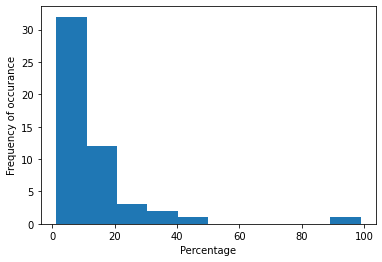

In [43]:
pyplot.hist(us_census.Hispanic)
pyplot.xlabel('Percentage')
pyplot.ylabel('Frequency of occurance')
pyplot.show()

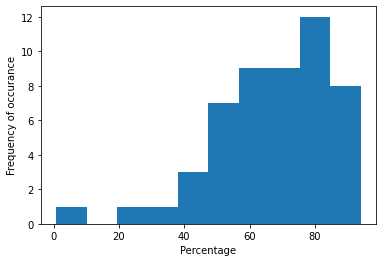

In [44]:
pyplot.hist(us_census.White)
pyplot.xlabel('Percentage')
pyplot.ylabel('Frequency of occurance')
pyplot.show()

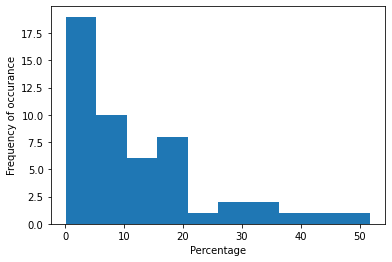

In [45]:
pyplot.hist(us_census.Black)
pyplot.xlabel('Percentage')
pyplot.ylabel('Frequency of occurance')
pyplot.show()

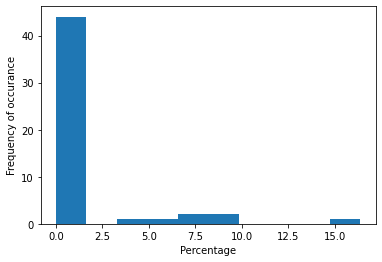

In [46]:
pyplot.hist(us_census.Native)
pyplot.xlabel('Percentage')
pyplot.ylabel('Frequency of occurance')
pyplot.show()

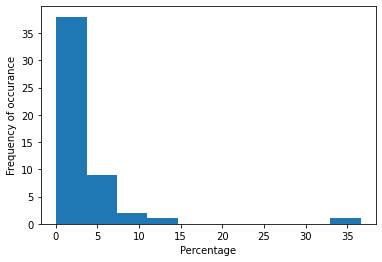

In [47]:
pyplot.hist(us_census.Asian)
pyplot.xlabel('Percentage')
pyplot.ylabel('Frequency of occurance')
pyplot.show()

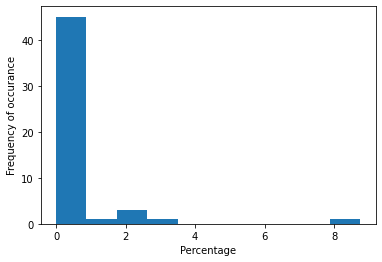

In [48]:
pyplot.hist(us_census.Pacific)
pyplot.xlabel('Percentage')
pyplot.ylabel('Frequency of occurance')
pyplot.show()